In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
labels={0:"0",1:"1",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7",8:"8",9:"9"}

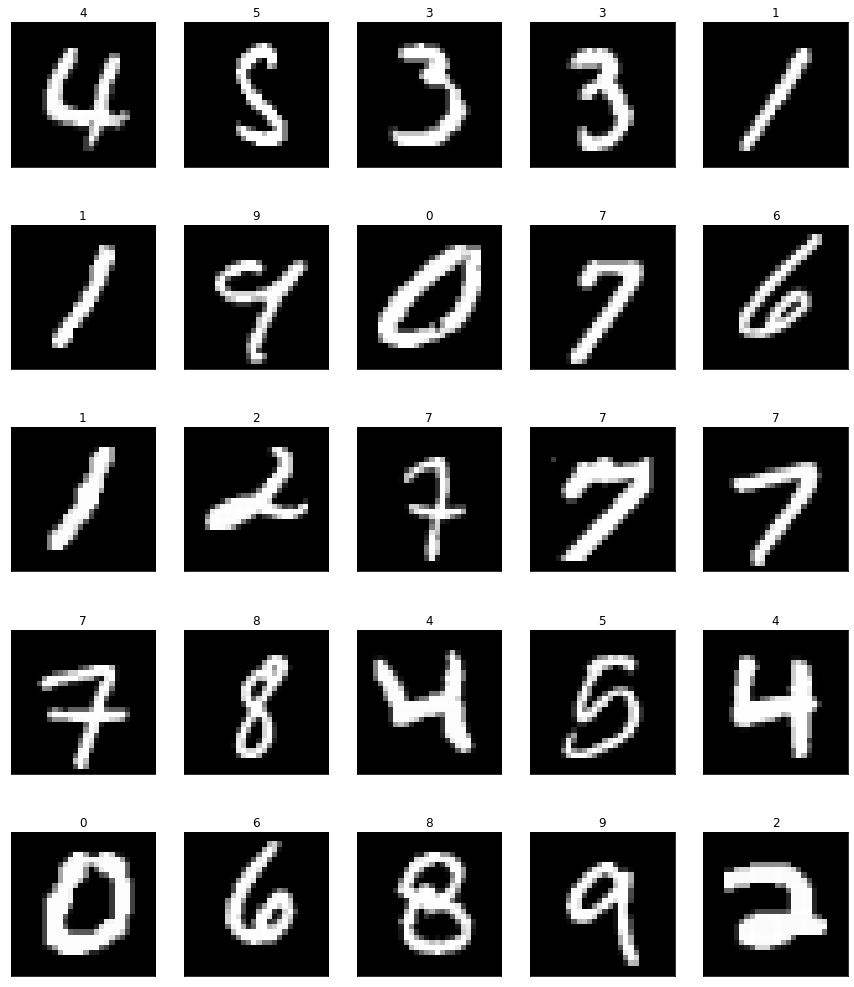

In [7]:
a=np.random.randint(low=0,high=1000,size=25)
fig=plt.figure(figsize=(15,18))
c=1
for i in a:
    fig.add_subplot(5,5,c)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap='gray')
    plt.title(labels[y_train[i]],fontsize=12)
    c+=1

In [8]:
x_train=x_train/255
x_test=x_test/255

In [10]:
noise_factor=0.2
noise_train=[]
for img in x_train:
    noisy_img = img + noise_factor* np.random.randn(*img.shape)
    noisy_img = np.clip(noisy_img , 0, 1)
    noise_train.append(noisy_img)

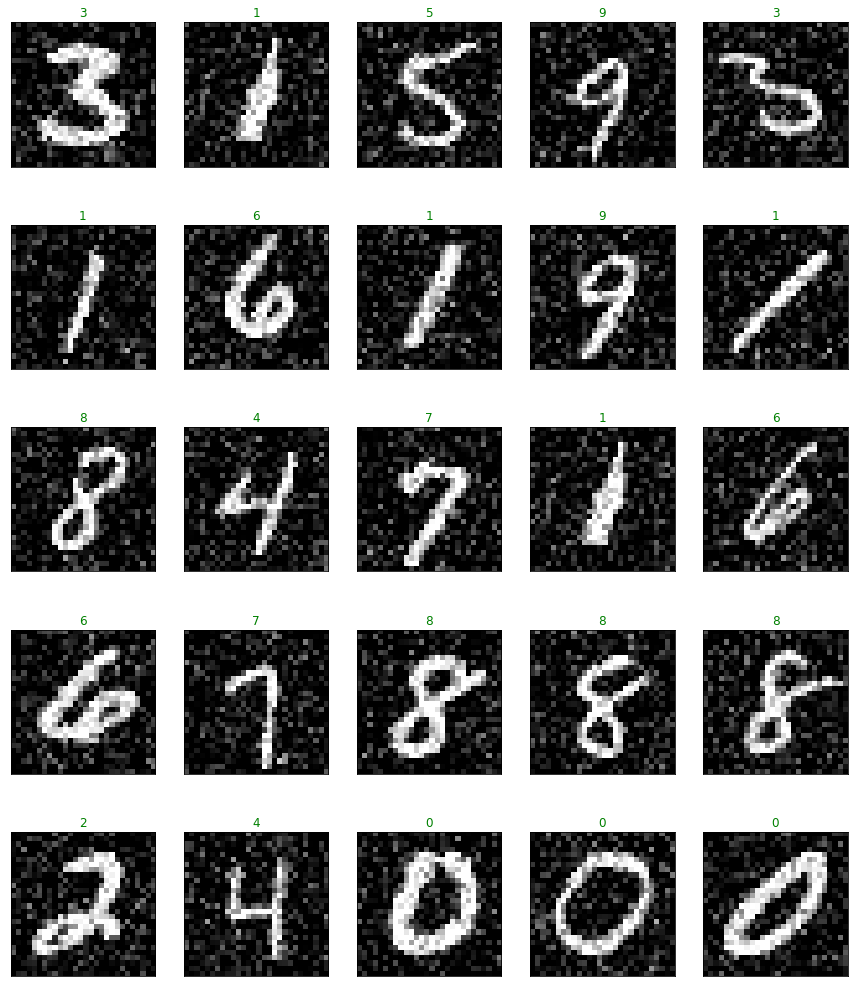

In [13]:
a=np.random.randint(low=0,high=1000,size=25)
fig=plt.figure(figsize=(15,18))
c=1
for i in a:
    fig.add_subplot(5,5,c)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(noise_train[i],cmap='gray')
    plt.title(labels[y_train[i]],color="green",fontsize=12)
    c+=1

In [17]:
noise_factor=0.2
noise_test=[]

for img in x_test:
    noisy_img = img + noise_factor* np.random.randn(*img.shape)
    noisy_img = np.clip(noisy_img , 0, 1)
    noise_test.append(noisy_img)

In [18]:
noise_test=np.array(noise_test)
noise_train=np.array(noise_train)

In [19]:
autoencoder= tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),strides=2,padding='same',input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(16,(3,3),strides=2,padding='same'),
    tf.keras.layers.Conv2D(16,(3,3),strides=1,padding='same'),
    tf.keras.layers.Conv2DTranspose(32,(3,3),strides=2,padding='same'),
    tf.keras.layers.Conv2DTranspose(1,(3,3),strides=2,padding='same',activation='sigmoid'),
])
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 16)          4624      
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       4640      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 1)        289       
 ranspose)                                                       
                                                                 
Total params: 12,193
Trainable params: 12,193
Non-traina

In [21]:
autoencoder.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=['accuracy'])

In [22]:
valid_noise=noise_test[:5000,:]
valid_y=x_test[:5000,:]
noise_test = noise_test[5000:,:]
x_test = x_test[5000:,:]
print(valid_noise.shape,valid_y.shape,noise_test.shape,x_test.shape)

(5000, 28, 28) (5000, 28, 28) (5000, 28, 28) (5000, 28, 28)


In [25]:
autoencoder.fit(noise_train.reshape(-1,28,28,1),
               x_train.reshape(-1,28,28,1),
               epochs=5,
               batch_size=64,
               validation_data=(valid_noise.reshape(-1,28,28,1),valid_y.reshape(-1,28,28,1)))

Epoch 1/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0750 - accuracy: 0.8154 - val_loss: 0.0742 - val_accuracy: 0.8242
Epoch 2/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0749 - accuracy: 0.8154 - val_loss: 0.0739 - val_accuracy: 0.8242
Epoch 3/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0749 - accuracy: 0.8154 - val_loss: 0.0740 - val_accuracy: 0.8242
Epoch 4/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0749 - accuracy: 0.8154 - val_loss: 0.0741 - val_accuracy: 0.8242
Epoch 5/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0749 - accuracy: 0.8154 - val_loss: 0.0740 - val_accuracy: 0.8242


In [26]:
metric = autoencoder.evaluate(noise_test.reshape(-1,28,28,1),x_test.reshape(-1,28,28,1))

157/157 [==============================] - 1s 6ms/step - loss: 0.0748 - accuracy: 0.8047


1/1 [==============================] - 0s 25ms/step


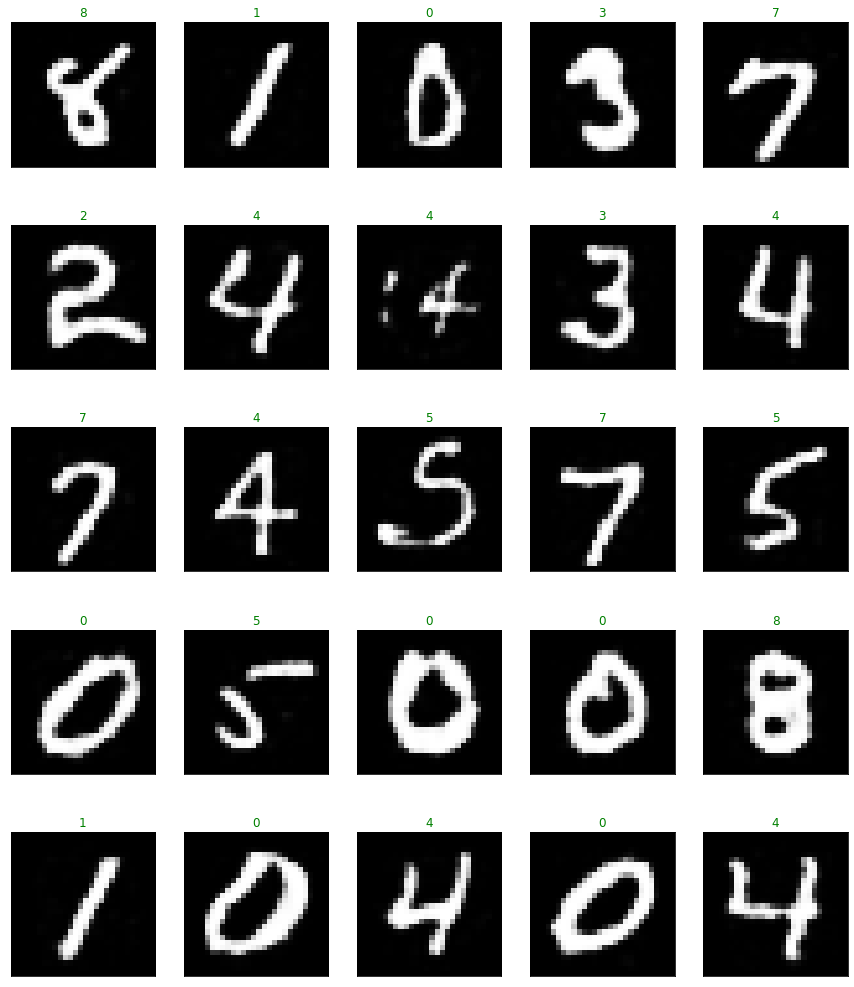

In [28]:
a=np.random.randint(low=0,high=1000,size=25)
fig=plt.figure(figsize=(15,18))
c=1
for i in a:
    pred=autoencoder.predict(noise_test[i].reshape(1,28,28,1))
    fig.add_subplot(5,5,c)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(pred.reshape(28,28),cmap='gray')
    plt.title(labels[y_test[5000:][i]],color="green",fontsize=12)
    c+=1